## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  93.819310   618.588499  0.329928  7.712146  0.946205
1  86.396162   186.617768  0.293214  1.882016  0.662608
2  93.838980  1349.288854  0.011970  8.579892  0.141852
3  78.703183   730.663356  0.224169  3.467332  1.118110
4  55.896872   911.731884  0.292735  2.558580  1.284917


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.94548 | train_mse: 3.44158 | train_mae: 1.38841 |  0:00:00s
epoch 1  | loss: 0.79707 | train_mse: 2.31036 | train_mae: 1.13074 |  0:00:00s
epoch 2  | loss: 0.56175 | train_mse: 1.63838 | train_mae: 0.86166 |  0:00:00s


epoch 3  | loss: 0.55681 | train_mse: 1.47936 | train_mae: 0.79313 |  0:00:00s
epoch 4  | loss: 0.72142 | train_mse: 1.68436 | train_mae: 0.82187 |  0:00:00s
epoch 5  | loss: 0.3476  | train_mse: 1.58884 | train_mae: 0.81843 |  0:00:00s


epoch 6  | loss: 0.51318 | train_mse: 1.54705 | train_mae: 0.77543 |  0:00:00s
epoch 7  | loss: 0.45872 | train_mse: 0.60331 | train_mae: 0.50596 |  0:00:00s
epoch 8  | loss: 0.52209 | train_mse: 0.71005 | train_mae: 0.55897 |  0:00:00s


epoch 9  | loss: 0.42021 | train_mse: 1.19586 | train_mae: 0.67025 |  0:00:00s
epoch 10 | loss: 0.40319 | train_mse: 1.32446 | train_mae: 0.68397 |  0:00:01s
epoch 11 | loss: 0.44434 | train_mse: 0.89635 | train_mae: 0.63464 |  0:00:01s


epoch 12 | loss: 0.29931 | train_mse: 0.68357 | train_mae: 0.59911 |  0:00:01s
epoch 13 | loss: 0.30091 | train_mse: 0.54976 | train_mae: 0.55274 |  0:00:01s
epoch 14 | loss: 0.26437 | train_mse: 0.47065 | train_mae: 0.51536 |  0:00:01s
epoch 15 | loss: 0.41818 | train_mse: 0.51745 | train_mae: 0.53232 |  0:00:01s


epoch 16 | loss: 0.36625 | train_mse: 0.58024 | train_mae: 0.56337 |  0:00:01s
epoch 17 | loss: 0.39997 | train_mse: 0.74998 | train_mae: 0.60465 |  0:00:01s
epoch 18 | loss: 0.43282 | train_mse: 0.81205 | train_mae: 0.60373 |  0:00:01s
epoch 19 | loss: 0.29244 | train_mse: 0.60747 | train_mae: 0.53963 |  0:00:01s


epoch 20 | loss: 0.24118 | train_mse: 0.35915 | train_mae: 0.44335 |  0:00:01s
epoch 21 | loss: 0.34089 | train_mse: 0.40829 | train_mae: 0.49825 |  0:00:01s
epoch 22 | loss: 0.5677  | train_mse: 0.35957 | train_mae: 0.48633 |  0:00:01s


epoch 23 | loss: 0.39108 | train_mse: 0.51933 | train_mae: 0.5338  |  0:00:01s
epoch 24 | loss: 0.3354  | train_mse: 0.54441 | train_mae: 0.53337 |  0:00:02s
epoch 25 | loss: 0.3767  | train_mse: 0.83338 | train_mae: 0.57213 |  0:00:02s
epoch 26 | loss: 0.22945 | train_mse: 0.65201 | train_mae: 0.53164 |  0:00:02s


epoch 27 | loss: 0.39624 | train_mse: 0.35216 | train_mae: 0.43105 |  0:00:02s
epoch 28 | loss: 0.37425 | train_mse: 0.33351 | train_mae: 0.44708 |  0:00:02s
epoch 29 | loss: 0.444   | train_mse: 0.26928 | train_mae: 0.40109 |  0:00:02s
epoch 30 | loss: 0.33868 | train_mse: 0.24359 | train_mae: 0.36933 |  0:00:02s


epoch 31 | loss: 0.2757  | train_mse: 0.33878 | train_mae: 0.4088  |  0:00:02s
epoch 32 | loss: 0.30714 | train_mse: 0.31916 | train_mae: 0.37898 |  0:00:02s
epoch 33 | loss: 0.27639 | train_mse: 0.32207 | train_mae: 0.39162 |  0:00:02s


epoch 34 | loss: 0.21227 | train_mse: 0.21121 | train_mae: 0.33232 |  0:00:02s
epoch 35 | loss: 0.22112 | train_mse: 0.18268 | train_mae: 0.30138 |  0:00:02s
epoch 36 | loss: 0.29607 | train_mse: 0.21869 | train_mae: 0.31749 |  0:00:02s


epoch 37 | loss: 0.36081 | train_mse: 0.26055 | train_mae: 0.32641 |  0:00:02s
epoch 38 | loss: 0.44115 | train_mse: 0.17713 | train_mae: 0.30174 |  0:00:03s
epoch 39 | loss: 0.27567 | train_mse: 0.17899 | train_mae: 0.30419 |  0:00:03s
epoch 40 | loss: 0.22265 | train_mse: 0.13192 | train_mae: 0.27991 |  0:00:03s


epoch 41 | loss: 0.27522 | train_mse: 0.17559 | train_mae: 0.302   |  0:00:03s
epoch 42 | loss: 0.28281 | train_mse: 0.2001  | train_mae: 0.30319 |  0:00:03s
epoch 43 | loss: 0.38331 | train_mse: 0.2318  | train_mae: 0.34    |  0:00:03s
epoch 44 | loss: 0.15921 | train_mse: 0.33195 | train_mae: 0.37923 |  0:00:03s


epoch 45 | loss: 0.23498 | train_mse: 0.30333 | train_mae: 0.3427  |  0:00:03s
epoch 46 | loss: 0.18922 | train_mse: 0.20138 | train_mae: 0.30891 |  0:00:03s
epoch 47 | loss: 0.40663 | train_mse: 0.29517 | train_mae: 0.33152 |  0:00:03s
epoch 48 | loss: 0.45199 | train_mse: 0.19437 | train_mae: 0.29886 |  0:00:03s


epoch 49 | loss: 0.34671 | train_mse: 0.16691 | train_mae: 0.30678 |  0:00:03s
epoch 50 | loss: 0.23113 | train_mse: 0.1839  | train_mae: 0.30883 |  0:00:03s
epoch 51 | loss: 0.28394 | train_mse: 0.17546 | train_mae: 0.30034 |  0:00:03s


epoch 52 | loss: 0.28075 | train_mse: 0.18645 | train_mae: 0.30811 |  0:00:03s
epoch 53 | loss: 0.16566 | train_mse: 0.15099 | train_mae: 0.29505 |  0:00:04s
epoch 54 | loss: 0.27631 | train_mse: 0.16805 | train_mae: 0.28552 |  0:00:04s


epoch 55 | loss: 0.26099 | train_mse: 0.12522 | train_mae: 0.26137 |  0:00:04s
epoch 56 | loss: 0.2866  | train_mse: 0.11603 | train_mae: 0.25598 |  0:00:04s
epoch 57 | loss: 0.11144 | train_mse: 0.13624 | train_mae: 0.26284 |  0:00:04s


epoch 58 | loss: 0.24415 | train_mse: 0.19356 | train_mae: 0.28903 |  0:00:04s
epoch 59 | loss: 0.14411 | train_mse: 0.16869 | train_mae: 0.28147 |  0:00:04s
epoch 60 | loss: 0.33944 | train_mse: 0.1587  | train_mae: 0.27872 |  0:00:04s


epoch 61 | loss: 0.12574 | train_mse: 0.12469 | train_mae: 0.26035 |  0:00:04s
epoch 62 | loss: 0.18058 | train_mse: 0.08852 | train_mae: 0.22534 |  0:00:04s
epoch 63 | loss: 0.13017 | train_mse: 0.14468 | train_mae: 0.26218 |  0:00:04s


epoch 64 | loss: 0.17091 | train_mse: 0.14616 | train_mae: 0.24678 |  0:00:04s
epoch 65 | loss: 0.66635 | train_mse: 0.17292 | train_mae: 0.25448 |  0:00:04s
epoch 66 | loss: 0.41418 | train_mse: 0.28546 | train_mae: 0.29087 |  0:00:05s


epoch 67 | loss: 0.31648 | train_mse: 0.28498 | train_mae: 0.29865 |  0:00:05s
epoch 68 | loss: 0.24929 | train_mse: 0.22537 | train_mae: 0.30673 |  0:00:05s
epoch 69 | loss: 0.14107 | train_mse: 0.13284 | train_mae: 0.29614 |  0:00:05s


epoch 70 | loss: 0.21317 | train_mse: 0.177   | train_mae: 0.28714 |  0:00:05s
epoch 71 | loss: 0.23541 | train_mse: 0.30051 | train_mae: 0.32418 |  0:00:05s
epoch 72 | loss: 0.23387 | train_mse: 0.23185 | train_mae: 0.317   |  0:00:05s


epoch 73 | loss: 0.1621  | train_mse: 0.14417 | train_mae: 0.27255 |  0:00:05s
epoch 74 | loss: 0.19385 | train_mse: 0.09679 | train_mae: 0.22543 |  0:00:05s
epoch 75 | loss: 0.12242 | train_mse: 0.12329 | train_mae: 0.26054 |  0:00:05s


epoch 76 | loss: 0.3371  | train_mse: 0.17622 | train_mae: 0.31018 |  0:00:05s


epoch 77 | loss: 0.4144  | train_mse: 0.16094 | train_mae: 0.29046 |  0:00:06s


epoch 78 | loss: 0.18781 | train_mse: 0.11702 | train_mae: 0.24731 |  0:00:06s
epoch 79 | loss: 0.11983 | train_mse: 0.08707 | train_mae: 0.2232  |  0:00:06s
epoch 80 | loss: 0.43354 | train_mse: 0.11023 | train_mae: 0.24141 |  0:00:06s


epoch 81 | loss: 0.17301 | train_mse: 0.11393 | train_mae: 0.24623 |  0:00:06s
epoch 82 | loss: 0.1839  | train_mse: 0.15739 | train_mae: 0.27109 |  0:00:06s
epoch 83 | loss: 0.26519 | train_mse: 0.15197 | train_mae: 0.26533 |  0:00:06s
epoch 84 | loss: 0.20875 | train_mse: 0.10077 | train_mae: 0.23492 |  0:00:06s


epoch 85 | loss: 0.28009 | train_mse: 0.12787 | train_mae: 0.25441 |  0:00:06s
epoch 86 | loss: 0.14568 | train_mse: 0.09385 | train_mae: 0.23164 |  0:00:07s
epoch 87 | loss: 0.28892 | train_mse: 0.07659 | train_mae: 0.21462 |  0:00:07s
epoch 88 | loss: 0.20984 | train_mse: 0.17244 | train_mae: 0.27841 |  0:00:07s


epoch 89 | loss: 0.17397 | train_mse: 0.21692 | train_mae: 0.28992 |  0:00:07s
epoch 90 | loss: 0.26245 | train_mse: 0.20384 | train_mae: 0.27478 |  0:00:07s
epoch 91 | loss: 0.1681  | train_mse: 0.17288 | train_mae: 0.26507 |  0:00:07s


epoch 92 | loss: 0.27743 | train_mse: 0.13285 | train_mae: 0.25873 |  0:00:07s
epoch 93 | loss: 0.08616 | train_mse: 0.10466 | train_mae: 0.23582 |  0:00:07s
epoch 94 | loss: 0.19948 | train_mse: 0.12097 | train_mae: 0.22237 |  0:00:07s


epoch 95 | loss: 0.14418 | train_mse: 0.27189 | train_mae: 0.30367 |  0:00:07s
epoch 96 | loss: 0.45028 | train_mse: 0.38118 | train_mae: 0.34574 |  0:00:07s
epoch 97 | loss: 0.23855 | train_mse: 0.2542  | train_mae: 0.29954 |  0:00:07s


epoch 98 | loss: 0.28589 | train_mse: 0.13952 | train_mae: 0.26089 |  0:00:07s
epoch 99 | loss: 0.26834 | train_mse: 0.11738 | train_mae: 0.24798 |  0:00:07s
epoch 100| loss: 0.0926  | train_mse: 0.12052 | train_mae: 0.2334  |  0:00:07s


epoch 101| loss: 0.17782 | train_mse: 0.12143 | train_mae: 0.23713 |  0:00:08s
epoch 102| loss: 0.31397 | train_mse: 0.09206 | train_mae: 0.22297 |  0:00:08s
epoch 103| loss: 0.16654 | train_mse: 0.09005 | train_mae: 0.22927 |  0:00:08s
epoch 104| loss: 0.23457 | train_mse: 0.10024 | train_mae: 0.22671 |  0:00:08s


epoch 105| loss: 0.21061 | train_mse: 0.10905 | train_mae: 0.23989 |  0:00:08s
epoch 106| loss: 0.13573 | train_mse: 0.09323 | train_mae: 0.23816 |  0:00:08s
epoch 107| loss: 0.22161 | train_mse: 0.08273 | train_mae: 0.22408 |  0:00:08s
epoch 108| loss: 0.24196 | train_mse: 0.07917 | train_mae: 0.22855 |  0:00:08s


epoch 109| loss: 0.23348 | train_mse: 0.07765 | train_mae: 0.22933 |  0:00:08s
epoch 110| loss: 0.14411 | train_mse: 0.07759 | train_mae: 0.2203  |  0:00:08s
epoch 111| loss: 0.19662 | train_mse: 0.071   | train_mae: 0.20736 |  0:00:08s
epoch 112| loss: 0.10637 | train_mse: 0.07112 | train_mae: 0.20975 |  0:00:08s


epoch 113| loss: 0.43738 | train_mse: 0.06925 | train_mae: 0.20372 |  0:00:08s
epoch 114| loss: 0.18049 | train_mse: 0.0771  | train_mae: 0.19619 |  0:00:08s
epoch 115| loss: 0.1399  | train_mse: 0.05861 | train_mae: 0.18727 |  0:00:09s


epoch 116| loss: 0.46802 | train_mse: 0.07296 | train_mae: 0.20451 |  0:00:09s
epoch 117| loss: 0.17068 | train_mse: 0.06724 | train_mae: 0.19931 |  0:00:09s
epoch 118| loss: 0.13311 | train_mse: 0.06644 | train_mae: 0.19927 |  0:00:09s
epoch 119| loss: 0.14788 | train_mse: 0.07648 | train_mae: 0.20815 |  0:00:09s


epoch 120| loss: 0.20252 | train_mse: 0.07177 | train_mae: 0.20841 |  0:00:09s
epoch 121| loss: 0.07834 | train_mse: 0.06274 | train_mae: 0.19344 |  0:00:09s
epoch 122| loss: 0.31177 | train_mse: 0.06889 | train_mae: 0.19874 |  0:00:09s
epoch 123| loss: 0.17903 | train_mse: 0.07546 | train_mae: 0.21304 |  0:00:09s


epoch 124| loss: 0.31477 | train_mse: 0.10021 | train_mae: 0.20541 |  0:00:09s
epoch 125| loss: 0.37389 | train_mse: 0.11806 | train_mae: 0.20754 |  0:00:09s
epoch 126| loss: 0.10649 | train_mse: 0.0971  | train_mae: 0.20153 |  0:00:09s
epoch 127| loss: 0.09735 | train_mse: 0.10057 | train_mae: 0.20422 |  0:00:09s


epoch 128| loss: 0.26305 | train_mse: 0.07468 | train_mae: 0.20077 |  0:00:09s
epoch 129| loss: 0.11618 | train_mse: 0.07153 | train_mae: 0.20033 |  0:00:09s
epoch 130| loss: 0.20247 | train_mse: 0.10414 | train_mae: 0.22025 |  0:00:10s


epoch 131| loss: 0.11812 | train_mse: 0.2316  | train_mae: 0.26795 |  0:00:10s
epoch 132| loss: 0.28095 | train_mse: 0.23457 | train_mae: 0.27087 |  0:00:10s
epoch 133| loss: 0.18189 | train_mse: 0.10042 | train_mae: 0.23076 |  0:00:10s
epoch 134| loss: 0.20113 | train_mse: 0.08994 | train_mae: 0.21858 |  0:00:10s


epoch 135| loss: 0.14857 | train_mse: 0.09174 | train_mae: 0.21966 |  0:00:10s
epoch 136| loss: 0.11459 | train_mse: 0.08802 | train_mae: 0.21659 |  0:00:10s
epoch 137| loss: 0.21382 | train_mse: 0.1264  | train_mae: 0.22292 |  0:00:10s
epoch 138| loss: 0.38068 | train_mse: 0.10521 | train_mae: 0.20078 |  0:00:10s


epoch 139| loss: 0.13887 | train_mse: 0.06379 | train_mae: 0.19144 |  0:00:10s
epoch 140| loss: 0.09044 | train_mse: 0.08315 | train_mae: 0.22048 |  0:00:10s
epoch 141| loss: 0.30379 | train_mse: 0.07307 | train_mae: 0.20806 |  0:00:10s
epoch 142| loss: 0.27785 | train_mse: 0.09418 | train_mae: 0.19485 |  0:00:10s


epoch 143| loss: 0.15832 | train_mse: 0.0943  | train_mae: 0.19796 |  0:00:10s
epoch 144| loss: 0.14912 | train_mse: 0.0714  | train_mae: 0.1948  |  0:00:10s
epoch 145| loss: 0.15316 | train_mse: 0.07401 | train_mae: 0.20658 |  0:00:11s


epoch 146| loss: 0.2019  | train_mse: 0.09726 | train_mae: 0.23927 |  0:00:11s
epoch 147| loss: 0.2289  | train_mse: 0.09286 | train_mae: 0.23105 |  0:00:11s
epoch 148| loss: 0.11658 | train_mse: 0.09768 | train_mae: 0.22161 |  0:00:11s
epoch 149| loss: 0.15302 | train_mse: 0.07568 | train_mae: 0.19355 |  0:00:11s


epoch 150| loss: 0.15754 | train_mse: 0.06615 | train_mae: 0.19146 |  0:00:11s
epoch 151| loss: 0.08441 | train_mse: 0.06275 | train_mae: 0.18596 |  0:00:11s
epoch 152| loss: 0.18078 | train_mse: 0.06623 | train_mae: 0.19806 |  0:00:11s
epoch 153| loss: 0.12034 | train_mse: 0.1094  | train_mae: 0.22596 |  0:00:11s


epoch 154| loss: 0.18867 | train_mse: 0.11169 | train_mae: 0.21929 |  0:00:11s
epoch 155| loss: 0.11693 | train_mse: 0.06141 | train_mae: 0.18713 |  0:00:11s
epoch 156| loss: 0.29332 | train_mse: 0.06634 | train_mae: 0.18358 |  0:00:11s
epoch 157| loss: 0.19626 | train_mse: 0.06713 | train_mae: 0.18756 |  0:00:11s


epoch 158| loss: 0.22554 | train_mse: 0.08436 | train_mae: 0.21813 |  0:00:11s
epoch 159| loss: 0.11939 | train_mse: 0.13759 | train_mae: 0.25195 |  0:00:12s
epoch 160| loss: 0.10362 | train_mse: 0.11703 | train_mae: 0.2348  |  0:00:12s


epoch 161| loss: 0.12667 | train_mse: 0.07699 | train_mae: 0.19767 |  0:00:12s
epoch 162| loss: 0.17971 | train_mse: 0.10998 | train_mae: 0.22831 |  0:00:12s
epoch 163| loss: 0.42433 | train_mse: 0.15109 | train_mae: 0.24461 |  0:00:12s
epoch 164| loss: 0.11792 | train_mse: 0.14883 | train_mae: 0.23704 |  0:00:12s


epoch 165| loss: 0.29339 | train_mse: 0.13271 | train_mae: 0.23626 |  0:00:12s
epoch 166| loss: 0.14078 | train_mse: 0.10888 | train_mae: 0.2239  |  0:00:12s
epoch 167| loss: 0.30081 | train_mse: 0.11301 | train_mae: 0.22534 |  0:00:12s
epoch 168| loss: 0.31926 | train_mse: 0.11408 | train_mae: 0.22673 |  0:00:12s


epoch 169| loss: 0.36728 | train_mse: 0.09798 | train_mae: 0.22346 |  0:00:12s
epoch 170| loss: 0.11403 | train_mse: 0.07818 | train_mae: 0.21187 |  0:00:12s
epoch 171| loss: 0.13067 | train_mse: 0.07435 | train_mae: 0.20791 |  0:00:12s


epoch 172| loss: 0.17984 | train_mse: 0.10285 | train_mae: 0.22927 |  0:00:12s
epoch 173| loss: 0.29293 | train_mse: 0.1139  | train_mae: 0.23665 |  0:00:12s
epoch 174| loss: 0.10088 | train_mse: 0.07923 | train_mae: 0.21112 |  0:00:13s


epoch 175| loss: 0.17889 | train_mse: 0.08942 | train_mae: 0.21035 |  0:00:13s
epoch 176| loss: 0.16598 | train_mse: 0.16901 | train_mae: 0.25899 |  0:00:13s
epoch 177| loss: 0.14432 | train_mse: 0.24855 | train_mae: 0.29131 |  0:00:13s
epoch 178| loss: 0.12669 | train_mse: 0.13584 | train_mae: 0.23869 |  0:00:13s


epoch 179| loss: 0.24924 | train_mse: 0.08838 | train_mae: 0.22376 |  0:00:13s
epoch 180| loss: 0.36668 | train_mse: 0.08889 | train_mae: 0.22043 |  0:00:13s
epoch 181| loss: 0.13138 | train_mse: 0.1037  | train_mae: 0.23539 |  0:00:13s


epoch 182| loss: 0.09932 | train_mse: 0.20309 | train_mae: 0.28005 |  0:00:13s
epoch 183| loss: 0.20189 | train_mse: 0.26134 | train_mae: 0.28854 |  0:00:13s
epoch 184| loss: 0.38837 | train_mse: 0.31628 | train_mae: 0.29437 |  0:00:13s
epoch 185| loss: 0.23724 | train_mse: 0.28064 | train_mae: 0.29095 |  0:00:13s


epoch 186| loss: 0.14357 | train_mse: 0.1795  | train_mae: 0.27814 |  0:00:13s
epoch 187| loss: 0.17771 | train_mse: 0.13329 | train_mae: 0.2684  |  0:00:13s
epoch 188| loss: 0.1362  | train_mse: 0.12453 | train_mae: 0.25892 |  0:00:13s


epoch 189| loss: 0.30337 | train_mse: 0.13188 | train_mae: 0.25804 |  0:00:14s
epoch 190| loss: 0.16842 | train_mse: 0.19259 | train_mae: 0.281   |  0:00:14s
epoch 191| loss: 0.16409 | train_mse: 0.36595 | train_mae: 0.32743 |  0:00:14s
epoch 192| loss: 0.21708 | train_mse: 0.36908 | train_mae: 0.31894 |  0:00:14s


epoch 193| loss: 0.14523 | train_mse: 0.29248 | train_mae: 0.28795 |  0:00:14s
epoch 194| loss: 0.07711 | train_mse: 0.20629 | train_mae: 0.26029 |  0:00:14s
epoch 195| loss: 0.38429 | train_mse: 0.09583 | train_mae: 0.21811 |  0:00:14s


epoch 196| loss: 0.099   | train_mse: 0.08092 | train_mae: 0.20536 |  0:00:14s
epoch 197| loss: 0.14332 | train_mse: 0.10279 | train_mae: 0.21512 |  0:00:14s
epoch 198| loss: 0.12999 | train_mse: 0.15298 | train_mae: 0.23466 |  0:00:14s
epoch 199| loss: 0.09377 | train_mse: 0.23362 | train_mae: 0.26706 |  0:00:14s


epoch 200| loss: 0.41236 | train_mse: 0.22402 | train_mae: 0.26769 |  0:00:14s
epoch 201| loss: 0.17985 | train_mse: 0.20933 | train_mae: 0.25749 |  0:00:14s
epoch 202| loss: 0.11393 | train_mse: 0.09834 | train_mae: 0.20819 |  0:00:15s


epoch 203| loss: 0.2503  | train_mse: 0.07332 | train_mae: 0.19434 |  0:00:15s
epoch 204| loss: 0.40972 | train_mse: 0.26338 | train_mae: 0.31032 |  0:00:15s
epoch 205| loss: 0.14957 | train_mse: 0.20187 | train_mae: 0.29101 |  0:00:15s
epoch 206| loss: 0.13046 | train_mse: 0.09543 | train_mae: 0.23293 |  0:00:15s

Early stopping occurred at epoch 206 with best_epoch = 156 and best_train_mae = 0.18358


Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

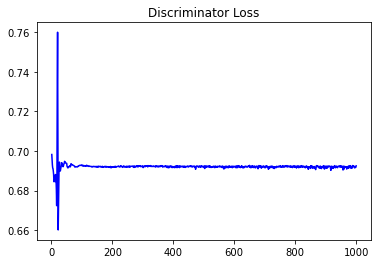

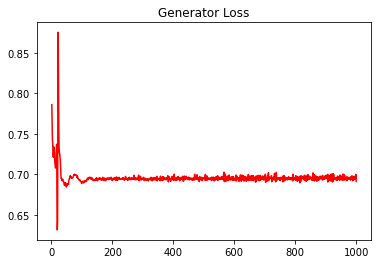

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1571858828324681


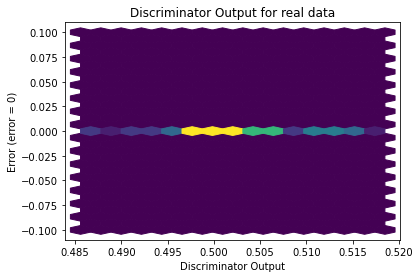

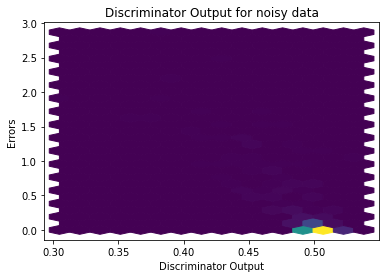

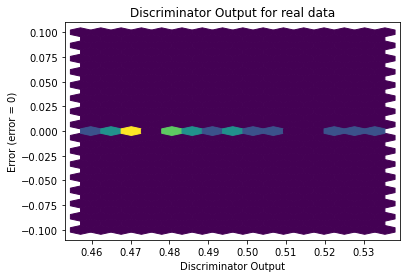

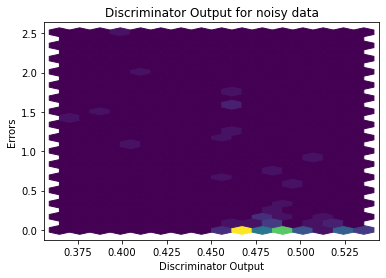

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


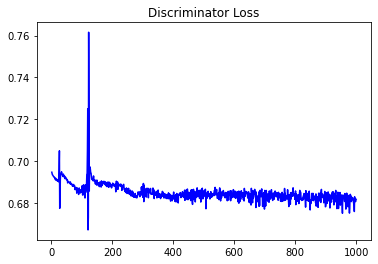

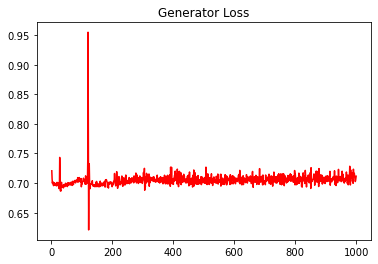

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2138076704438585


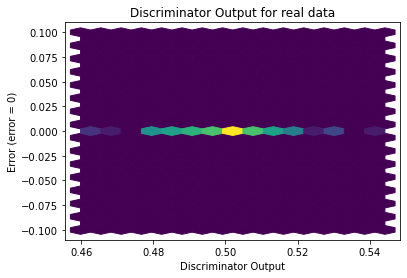

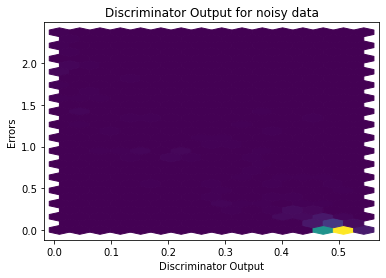

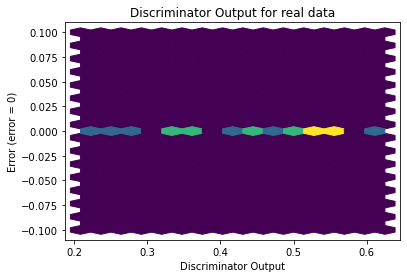

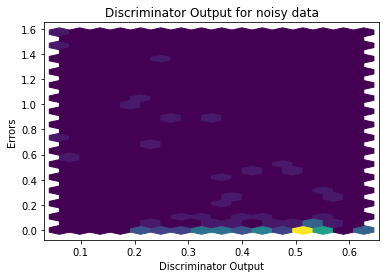

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1122]], requires_grad=True)
